## NLP Final Project

Bu projede datamız, Mayıs 1996'dan Temmuz 2014'e kadar listelenen tüm elektronik ürünler için Amazon müşteri yorumlarını içermektedir. 63.001 benzersiz ürün için toplam 192.403 müşteri tarafından toplam 1.689.188 yorum bulunmaktadır.Biz bu projede sadece 400000 veriyle çalışıp NLP tekniklerini uygulayacağız.Yani metni küçük harfe çevireceğiz,noktalama işaretlerini vb.kaldıracağız.Stopwordsleri kaldıracağız.Kelimeleri vektörize edeceğiz.Wordcloud oluşturup "Overall" sütununa göre classification algoritmalarını çalıştıracağız.

<img src='amazon.jpg' width=450 >

In [ ]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


### Kütüphaneleri Yükleme

In [ ]:
import nltk
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

In [ ]:
#df.to_csv("amazon.csv")
#Csv dosyasına dönüştürüyoruz.

In [ ]:
#from google.colab import files
#files.download("amazon.csv")
#Dosyayı indiriyoruz.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#df=pd.read_csv("amazon.csv")
#Dosyamızı csv dosyasından okuyoruz.

In [ ]:
#df=df.sample(400000)
#Veri çok büyük olduğu için rastgele 400000 veri seçeceğiz.

In [ ]:
#df.to_csv('amazon_data.csv', index=False)
#Seçtiğimiz kısmı bir csv dosyasına kaydedip,indexini sıfırlıyoruz.Buradan devam edeceğiz.

In [ ]:
df=pd.read_csv('amazon_data.csv')
#Kaydettiğimiz dosyayı okuyoruz.

### EDA - Exploratory Data Analysis - Keşifçi Veri Analizi

In [ ]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,398424,A3NJKVE5WNK6HF,B00167ZYMK,MN Buyer,"[0, 0]",This is a nice key board for kids. My son is 3...,5,Nice Keyboard for kids,1392854400,"02 20, 2014"
1,1337073,A8M5WFU0HL4PH,B007WTAJTO,AR,"[0, 0]","Got extremely solid speeds with it, no slack o...",5,Excellent solid SD Card,1382227200,"10 20, 2013"
2,1442088,AOP5TUC7TTEY0,B00932TQ9C,J,"[0, 0]",Bought this awhile ago and it didn't charge th...,1,Adapter,1382400000,"10 22, 2013"
3,1330416,A19OXVURRVELRR,B007T0NM2M,P. Fisher,"[0, 0]",If you unhook the factory xm antenna from the ...,4,Works with factory xm antenna,1372464000,"06 29, 2013"
4,1064265,A33EYUXTQ5F1S8,B0051PGX2I,"Seth K. ""Superfly""","[6, 6]","I'm sure the usb strip itself is fine, but the...",1,made in china junk,1357689600,"01 9, 2013"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      400000 non-null  int64 
 1   reviewerID      400000 non-null  object
 2   asin            400000 non-null  object
 3   reviewerName    393980 non-null  object
 4   helpful         400000 non-null  object
 5   reviewText      399740 non-null  object
 6   overall         400000 non-null  int64 
 7   summary         399994 non-null  object
 8   unixReviewTime  400000 non-null  int64 
 9   reviewTime      400000 non-null  object
dtypes: int64(3), object(7)
memory usage: 30.5+ MB


In [ ]:
df.shape

(400000, 10)

In [ ]:
df=df[['reviewText','overall','summary','reviewTime']]
#Lazım olan sütunları seçiyoruz.

In [ ]:
df.columns=['text','overall','summary','review_time']
#Sütunları tekrar isimlendiriyoruz.

In [ ]:
df.isnull().sum()

,0
text,260
overall,0
summary,6
review_time,0


In [ ]:
df=df.dropna()
#Boş değerleri siliyoruz.

In [ ]:
import html

df = html.unescape(df)
#Html işaretlerini kaldırıyoruz.

In [ ]:
pattern = r"\&\#[0-9]+\;"
df["text"] = df["text"].str.replace(pat=pattern, repl="", regex=True)

In [ ]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\n','',regex=True)
df['text']=df['text'].str.replace('\r','',regex=True)
#Noktalama işaretlerini vb.diğer ifadeleri kaldırıyorzm.

In [ ]:
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["text"] = df["text"].apply(remove_accent)
#Metinlerdeki aksanları yani farklı alfabe harflerine sahip olanları kaldırıyoruz.

In [ ]:
df['overall'].value_counts()

,count
overall,
5,238682
4,81886
3,33751
1,25925
2,19490


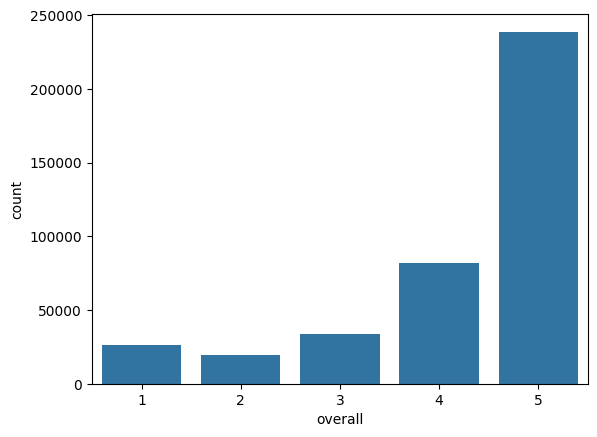

In [ ]:
sns.countplot(x=df['overall']);

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### İngilizce Olmayan Dilleri Ayırma

In [ ]:
#pip install langdetect
#from langdetect import detect
#df['lang']=df['text'].apply(lambda x: detect(x))

In [ ]:
#pip install langid

In [ ]:
import langid
#Langdetect çalışmadığı için farklı bir kütüphane kullanıyorum.

In [ ]:
df['lang']=df['text'].apply(lambda x: langid.classify(x)[0])

In [ ]:
df['lang'].value_counts()

,count
lang,
en,398955
es,520
pt,45
fr,37
de,32
nl,29
it,25
da,15
id,9


In [ ]:
import matplotlib.pyplot as plt

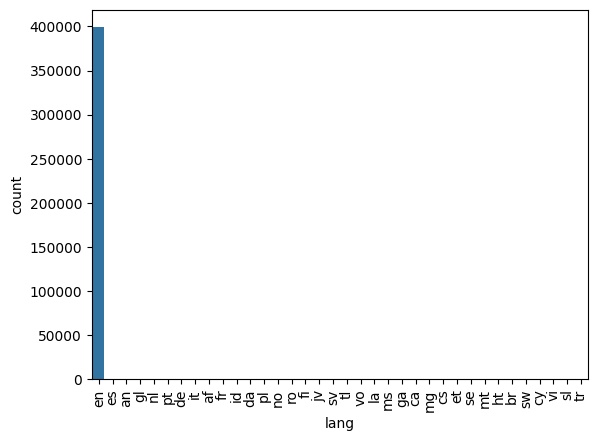

In [ ]:
sns.countplot(x=df['lang'])
plt.xticks(rotation=90);

In [ ]:
df[df['lang'] == 'es']
#Farklı dilde olan yorumlara bir örnek

,text,overall,summary,review_time,lang
91,me gusto la camara era lo que esperaba muchas ...,5,:),"02 2, 2013",es
934,se ve material resistente para proteger la cam...,4,PRACTICA,"12 14, 2012",es
2979,este producto lo compreacute para obsequiaacut...,5,Muy buen producto,"06 23, 2011",es
4916,funciona genial con mi iphone les recomiendo e...,5,SUPER,"02 3, 2013",es
5344,forro bello genial practico duradero solo para...,5,Love pink,"09 3, 2012",es
...,...,...,...,...,...
397668,me gusta mucho los productos a apple son hecho...,5,recomiendo este producto,"09 16, 2010",es
398085,la tascam dp tiene lo que se necesita para hac...,5,Lo Necesario,"03 19, 2012",es
398136,good product no problem,4,Four Stars,"07 9, 2014",es
398574,bueno ueno el disco duro de muy muy muy huen t...,5,Lime,"01 16, 2013",es


In [ ]:
df = df[df['lang'] == 'en']
#Sadece ingilizce olanları alıyoruz.

In [ ]:
df['lang'].value_counts()

,count
lang,
en,398955


### Sentiment Analizi

In [ ]:
df.loc[(df['overall']==1)|(df['overall']==2),'sentiment']='negative'
df.loc[(df['overall']==3,'sentiment')]='neutral'
df.loc[(df['overall']==4)|(df['overall']==5),'sentiment']='positive'

In [ ]:
df.head()

,text,overall,summary,review_time,lang,sentiment
0,this is a nice key board for kids my son is y...,5,Nice Keyboard for kids,"02 20, 2014",en,positive
1,got extremely solid speeds with it no slack on...,5,Excellent solid SD Card,"10 20, 2013",en,positive
2,bought this awhile ago and it didnt charge the...,1,Adapter,"10 22, 2013",en,negative
3,if you unhook the factory xm antenna from the ...,4,Works with factory xm antenna,"06 29, 2013",en,positive
4,im sure the usb strip itself is fine but the p...,1,made in china junk,"01 9, 2013",en,negative


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,319873
negative,45371
neutral,33711


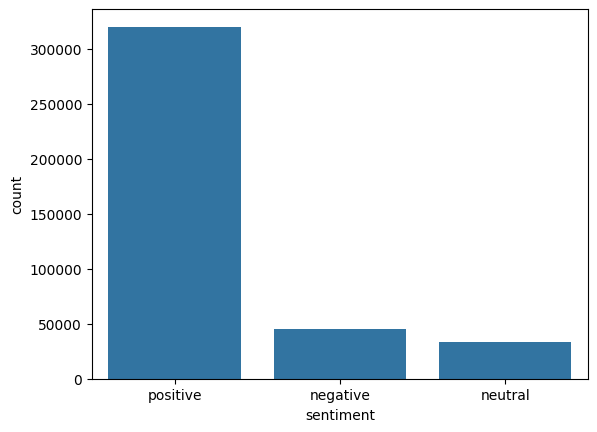

In [ ]:
sns.countplot(x=df['sentiment']);

### WordCloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [ ]:
def wc(data,bgcolor):
    plt.figure(figsize=(6,6))
    mask=np.array(Image.open('like.png'))
    wc=WordCloud(background_color=bgcolor,stopwords='STOPWORDS',mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

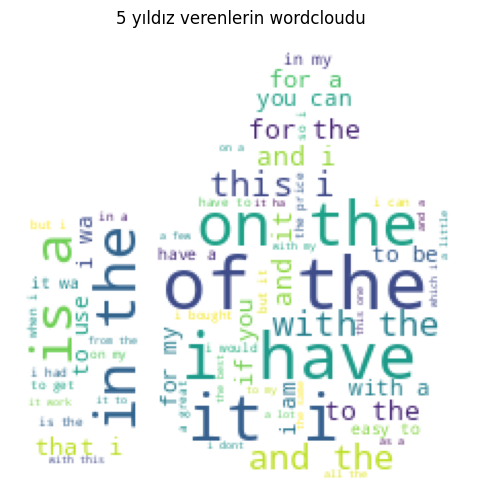

In [ ]:
like=df[df['overall']==5]['text']
wc(like,'white')
plt.title('5 yıldız verenlerin wordcloudu');

In [ ]:
def wc(data,bgcolor):
    plt.figure(figsize=(6,6))
    mask=np.array(Image.open('dislike.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

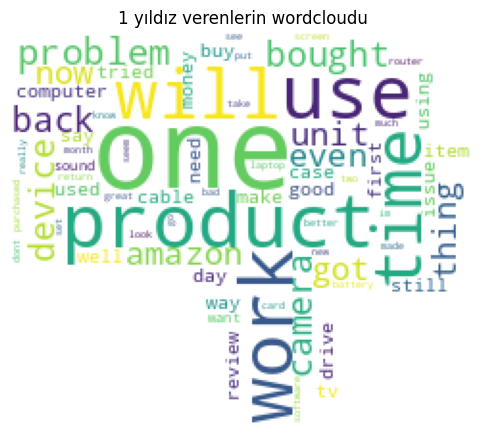

In [ ]:
dislike=df[df['overall']==1]['text']
wc(dislike,'white')
plt.title('1 yıldız verenlerin wordcloudu');

In [ ]:
pozitive=df[df['sentiment']=='positive']['text']
negative=df[df['sentiment']=='negative']['text']
neutral=df[df['sentiment']=='neutral']['text']

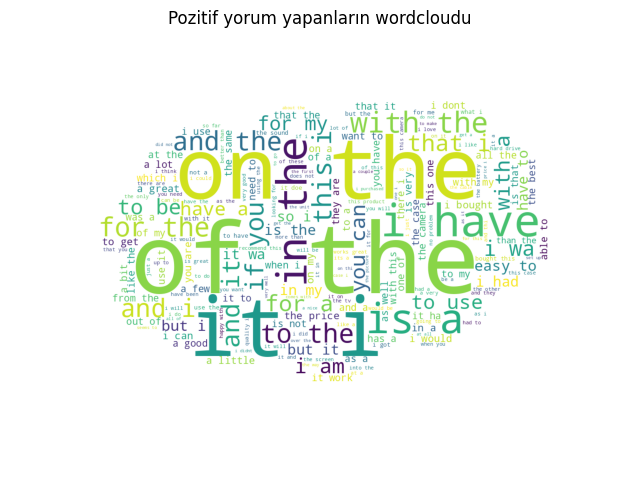

In [ ]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords='STOPWORDS', mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

wc(pozitive)
plt.title('Pozitif yorum yapanların wordcloudu');

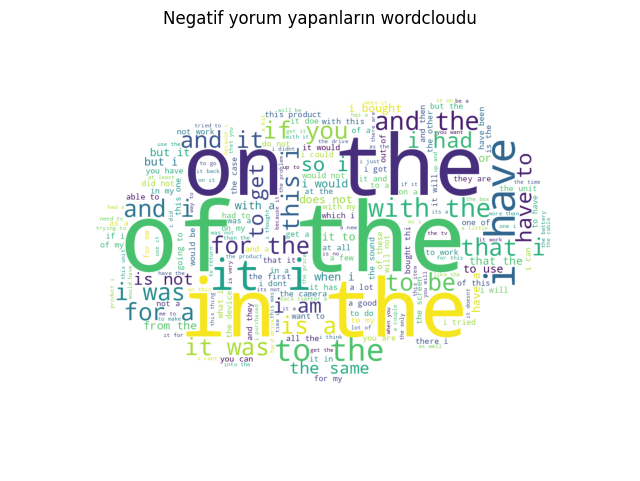

In [ ]:
wc(negative)
plt.title('Negatif yorum yapanların wordcloudu');

In [ ]:
neutral.sample(7)

,text
278665,i bought of these charger cords i loved the ...
206564,the ocosmo television has a nice picture but t...
322623,sounds much better than the standard panasonic...
384887,i recently finished a major project ripping my...
221348,it was a bit awkward typing with it as its not...
41642,considering the cost this is an ok mp player ...
13742,this case provides a great slim protection for...


In [ ]:
neutral[223605]

'i purchased this product for my acer laptop that does not have an external hard drivenegative  noisy runs slow takes time to read datapositives  inexpensive nice looking design hardy cover'

In [ ]:
df['text'].sample(10)

,text
94139,this was a really good product and it worked e...
218425,so i got of these from a seller that sold the...
97837,at times the ipad reports that it is not compa...
192750,high definition is a misnomer more like cheap ...
165609,i purchased two of these so i could stick my c...
107893,the link is a wonderful product i bought this...
346335,this is a great cover i am so glad i did not f...
354687,first of all the extender really works i can n...
100655,i love logitech keyboards they have the best ...
352017,installed a usb epci card in my pc and hooked...


In [ ]:
df['text'][352017]

'installed a usb  epci card in my pc and hooked this up via the usb  cable  i periodically get the drive dropping offon but thats an issue with my card and usb ive also used it on usb  and it works perfectly this dock works great  its much more compact than the current sata usb  black docks and easy to insertremove a hard drive  if i had to provide any suggestions i would mentione that the onoff button is small and located near the power cord insert so its a bit more of a challenge to turn the unit onoff than the other docks  would like to have it located near the side for ease of access but a minor quible  this dock is worth the price and much better than the large black docks available'

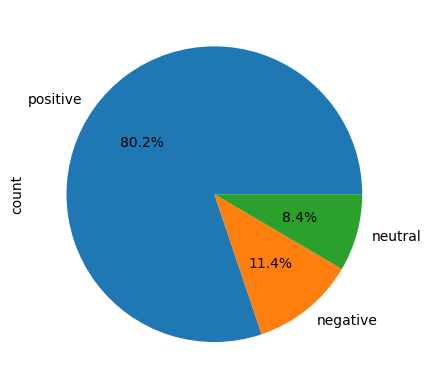

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%');

### Polarity-Subjectivity

In [ ]:
from textblob import TextBlob

In [ ]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
df.head()

,text,overall,summary,review_time,lang,sentiment,polarity,subjectivity
0,this is a nice key board for kids my son is y...,5,Nice Keyboard for kids,"02 20, 2014",en,positive,0.175000,0.575000
1,got extremely solid speeds with it no slack on...,5,Excellent solid SD Card,"10 20, 2013",en,positive,0.333333,0.400000
2,bought this awhile ago and it didnt charge the...,1,Adapter,"10 22, 2013",en,negative,0.045455,0.568182
3,if you unhook the factory xm antenna from the ...,4,Works with factory xm antenna,"06 29, 2013",en,positive,0.000000,0.539286
4,im sure the usb strip itself is fine but the p...,1,made in china junk,"01 9, 2013",en,negative,-0.043056,0.443981


### Stop Wordsleri Kaldırma ve Vektörize Etme

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob

In [ ]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [ ]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [ ]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

### Modelleme

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification

In [ ]:
import pickle

In [ ]:
df.head()

,text,overall,summary,review_time,lang,sentiment,polarity,subjectivity
0,this is a nice key board for kids my son is y...,5,Nice Keyboard for kids,"02 20, 2014",en,positive,0.175000,0.575000
1,got extremely solid speeds with it no slack on...,5,Excellent solid SD Card,"10 20, 2013",en,positive,0.333333,0.400000
2,bought this awhile ago and it didnt charge the...,1,Adapter,"10 22, 2013",en,negative,0.045455,0.568182
3,if you unhook the factory xm antenna from the ...,4,Works with factory xm antenna,"06 29, 2013",en,positive,0.000000,0.539286
4,im sure the usb strip itself is fine but the p...,1,made in china junk,"01 9, 2013",en,negative,-0.043056,0.443981


In [ ]:
x=df['text']
y=df['overall']

In [ ]:
x=vect.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

In [ ]:
m=MultinomialNB()
model=m.fit(x_train,y_train)

In [ ]:
pickle.dump(model,open('nlp_final.pkl','wb'))
#Modelimizi kaydediyoruz.

In [ ]:
mpred=m.predict(x_test)
accuracy_score(mpred,y_test)

0.6134150468097905

In [ ]:
print(classification_report(mpred, y_test))

              precision    recall  f1-score   support

           1       0.64      0.34      0.45      9453
           2       0.15      0.23      0.18      2600
           3       0.21      0.28      0.24      4996
           4       0.32      0.42      0.36     12654
           5       0.81      0.77      0.79     50088

    accuracy                           0.61     79791
   macro avg       0.42      0.41      0.40     79791
weighted avg       0.65      0.61      0.63     79791



In [ ]:
confusion_matrix(mpred, y_test)

array([[ 3242,  1360,  1141,  1181,  2529],
       [  531,   591,   501,   502,   475],
       [  400,   771,  1400,  1386,  1039],
       [  205,   493,  1751,  5270,  4935],
       [  699,   768,  1927,  8252, 38442]])

<Axes: >

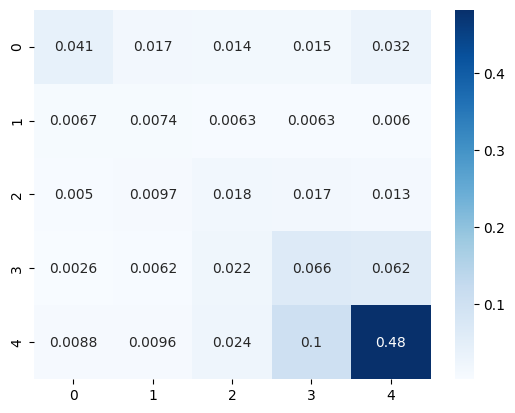

In [ ]:
cm = confusion_matrix(mpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues')

In [ ]:
#Bernoulli

In [ ]:
b=BernoulliNB()
model=b.fit(x_train,y_train)
bpred=model.predict(x_test)
accuracy_score(bpred,y_test)

0.5506385431940946

In [ ]:
print(classification_report(bpred, y_test))

              precision    recall  f1-score   support

           1       0.35      0.42      0.38      4244
           2       0.22      0.17      0.19      5144
           3       0.11      0.28      0.16      2615
           4       0.30      0.32      0.31     15560
           5       0.75      0.68      0.71     52228

    accuracy                           0.55     79791
   macro avg       0.35      0.37      0.35     79791
weighted avg       0.59      0.55      0.57     79791



In [ ]:
confusion_matrix(bpred, y_test)

array([[ 1779,   675,   461,   436,   893],
       [  960,   868,   840,   999,  1477],
       [  180,   427,   724,   707,   577],
       [  129,   336,  1275,  4956,  8864],
       [ 2029,  1677,  3420,  9493, 35609]])

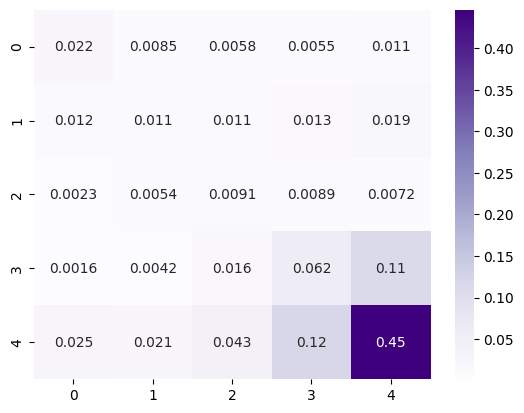

In [ ]:
cm = confusion_matrix(bpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples');

In [ ]:
#Logistic Regression

In [ ]:
l=LogisticRegression()
model=l.fit(x_train,y_train)
lpred=l.predict(x_test)
accuracy_score(lpred,y_test)

0.6542843177802008

In [ ]:
print(classification_report(lpred, y_test))

              precision    recall  f1-score   support

           1       0.48      0.54      0.51      4477
           2       0.08      0.29      0.12      1034
           3       0.16      0.35      0.22      2998
           4       0.23      0.49      0.31      7814
           5       0.94      0.70      0.80     63468

    accuracy                           0.65     79791
   macro avg       0.38      0.48      0.39     79791
weighted avg       0.80      0.65      0.71     79791



In [ ]:
confusion_matrix(lpred, y_test)

array([[ 2418,   874,   499,   294,   392],
       [  204,   302,   239,   158,   131],
       [  304,   602,  1061,   719,   312],
       [  221,   445,  1346,  3821,  1981],
       [ 1930,  1760,  3575, 11599, 44604]])

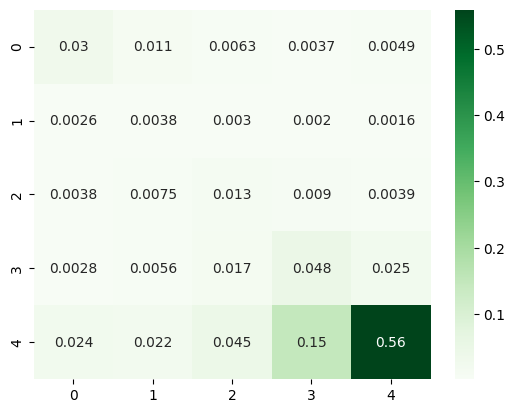

In [ ]:
cm = confusion_matrix(lpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Greens');

## Özet

Bu projede elimizde yaklaşık 1 milyon verisi olan bir amazon datası vardı.Proje çözülmüştü.Bizden daha kısa kodlarla çözmemiz istenmişti.Data çok büyük olduğu için 400000 veriyle çalıştık.İlk başta gerekli olan sütunları seçtik.İsimlerini değiştirdik.Boş olan değerleri sildik.Kelimeleri küçük harfe çevirdik.Rakamları vs.kaldırdık.Html,noktalama işareti vb.gibi olan işaretleri kaldırdık.Farklı alfabeden olan harfleri çıkardık.İngilizce dışındaki dilleri de kaldırdık.Daha sonra sentiment analizi yaptık.1 ve 2 yıldız verenlere negatif,3 yıldız verenlere nötr,4 ve 5 yıldız verenlere pozitif dedik.Bunların wordcloud'unu oluşturduk.Metinlerdeki öznellik yani subjectivity ve polarity yani metnin yüzde kaç olumlu,olumsuz olduğunu hesapladık.Stop wordsleri kaldırdık ve vektörize etme işlemi gerçekleştirdik.Sonrasında modelleme işlemine geçtik.Y olarak overall sütunu kullanmamız istenmişti.X ve y'yi belirledik.Modelimizi eğittik,başarı oranımızı ölçtük.Classification report ve confusion matrix gibi diğer metriklerde de inceledik.Confusion matrixin  de görselleştirmesini yaptıktan sonra projemizi bitirdik.